In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

In [4]:
iname = './lena.jpg'

In [5]:
# read image
img = cv2.imread(iname)

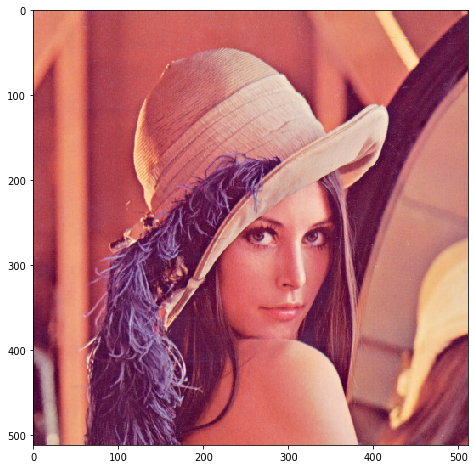

In [6]:
plt.imshow(img[:,:,::-1])

In [7]:
h, w, c = img.shape

In [16]:
print("h = ", h)
print("w = ", w)
print("c = ", c)

h =  512
w =  512
c =  3


In [54]:
# so hang ngang va so hang doc
n = 8
NUM_BLOCK = n ** 2

In [55]:
# sx lộn xộn các số
shuf = np.random.permutation(NUM_BLOCK)

In [56]:
shuf

array([62, 31, 27, 10, 59, 19, 23, 29,  0, 56, 43, 39, 20,  3, 45, 11, 46,
       18,  7, 47,  9, 30,  5, 15, 50, 34, 14, 36, 33, 55,  6, 51, 24, 40,
       61, 58, 25, 42, 49, 21, 63, 57, 60,  2, 13, 37, 41,  8, 12, 38, 32,
       52, 48, 26, 17,  1, 28, 16,  4, 53, 22, 44, 54, 35])

In [61]:
def make_puzzle(img):
    ratio_h = int(h/n)
    ratio_w = int(w/n)
    print(n)
    #Lưu các chỉ số theo hàng ngang và hàng dọc
    height = []
    width = []
    for i in range(n+1):
        height.append(ratio_h*i)
        width.append(ratio_w*i)
        
    # Tạo ra các ảnh nhỏ
    pieces = []
    for i in range(n):
        for j in range(n):
            crop = img[height[i]:height[i+1],width[j]:width[j+1]]
            pieces.append(crop)
    
    # Ghép lại thành câu đó
    shuffle_img=cv2.hconcat([pieces[shuf[0]],pieces[shuf[1]]])
    for j in range(2,n):
        shuffle_img=cv2.hconcat([shuffle_img,pieces[shuf[j]]])
    for i in range(1,n):
        im_re=cv2.hconcat([pieces[shuf[n*i]],pieces[shuf[n*i+1]]])
        for j in range(n-2):
            im_re=cv2.hconcat([im_re,pieces[shuf[n*i+j+2]]])
        shuffle_img=cv2.vconcat([shuffle_img,im_re])

    return shuffle_img

In [62]:
output = make_puzzle(img)

8


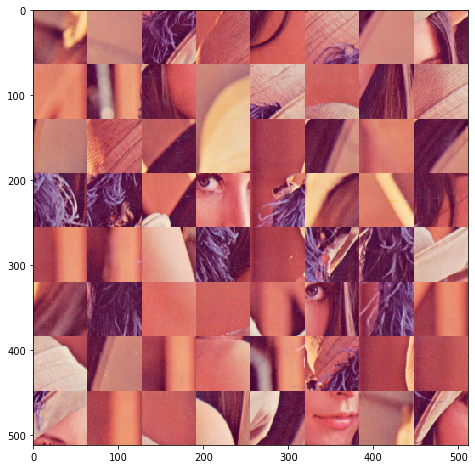

In [63]:
plt.imshow(output[:,:,::-1])

In [93]:
def puzzle_solver(original, img):
    original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    ratio_h = int(h/n)
    ratio_w = int(w/n)
    height = []
    width = []
    original = original[:n*ratio_h, :n*ratio_w]
    for i in range(n+1):
        height.append(ratio_h * i)
        width.append(ratio_w * i)
    
    # cắt input_image thành những mảng nhỏ và tìm vị trí thích hợp nhất cho chúng
    pieces = []
    ans = []
    for i in range(n):
        for j in range(n):
            crop = img[height[i]:height[i+1],width[j]:width[j+1]]
            pieces.append(crop)
            
            
            crop_gray=cv2.cvtColor(crop,cv2.COLOR_BGR2GRAY)
            temp = cv2.matchTemplate(original,crop_gray, cv2.TM_CCOEFF_NORMED)
            #Finds the global minimum and maximum in an array.
            minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(temp)
            #print(temp)
            #vi tri cua anh do trong mang
            vt = n * round(maxLoc[1]/h * n) + round(maxLoc[0]/w *n)
            ans.append([vt, crop])
    # sx theo thứ tự vị trí
    ans.sort(key=lambda x: x[0])
    
    # Tuowng tự như trên kết hợp tạo ra ảnh
    im_re2=cv2.hconcat([ans[0][1],ans[1][1]])
    for j in range(2,n):
        im_re2=cv2.hconcat([im_re2,ans[j][1]])
    for i in range(1,n):
        im_re=cv2.hconcat([ans[n*i][1],ans[n*i+1][1]])
        for j in range(n-2):
            im_re=cv2.hconcat([im_re,ans[n*i+j+2][1]])
        im_re2=cv2.vconcat([im_re2,im_re])
    return im_re2

In [94]:
solution = puzzle_solver(img, output)

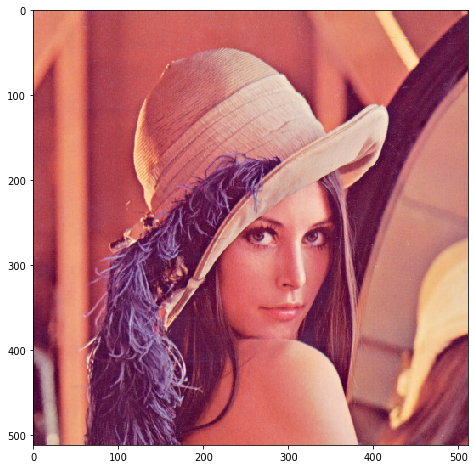

In [96]:
plt.imshow(solution[:,:,::-1])

In [97]:
cv2.imwrite('make_puzzle.jpg', output)
cv2.imwrite('solver_puzzle.jpg', solution)

True